In [1]:
if(!require(readr)) install.packages("readr")
library(readr)
github="https://raw.githubusercontent.com/agronomy4future/raw_data_practice/refs/heads/main/chlorophyll_content_2024.csv"
df= data.frame(read_csv(url(github), show_col_types=FALSE))

print(head(df,5))
print(tail(df,5))

Loading required package: readr



  season    crop reps days   ch
1   2024 Sorghum    1   65 65.8
2   2024 Sorghum    2   65 63.0
3   2024 Sorghum    3   65 62.7
4   2024 Sorghum    4   65 61.4
5   2024 Sorghum    1   75 57.3
   season    crop reps days   ch
52   2024 Soybean    4  115 35.3
53   2024 Soybean    1  125  9.2
54   2024 Soybean    2  125  0.0
55   2024 Soybean    3  125  7.2
56   2024 Soybean    4  125  6.1


In [6]:
if(!require(dplyr)) install.packages("dplyr")
library(dplyr)
dataA= data.frame(df %>%
                    group_by(crop, days) %>%
                    dplyr::summarize(across(c(ch),
                                            .fns= list(Mean= mean,
                                                       SD= sd,
                                                       n= length,
                                                       se= ~ sd(.)/sqrt(length(.))))))

print(dataA)

`summarise()` has grouped output by 'crop'. You can override using the
`.groups` argument.


      crop days ch_Mean    ch_SD ch_n     ch_se
1  Sorghum   65  63.225 1.851801    4 0.9259005
2  Sorghum   75  58.175 1.534872    4 0.7674362
3  Sorghum   85  56.725 2.206619    4 1.1033094
4  Sorghum   95  53.625 2.312827    4 1.1564133
5  Sorghum  105  51.300 2.493993    4 1.2469964
6  Sorghum  115  48.925 2.950000    4 1.4750000
7  Sorghum  125  46.000 4.252842    4 2.1264211
8  Soybean   65  43.675 2.991516    4 1.4957579
9  Soybean   75  42.625 2.940947    4 1.4704733
10 Soybean   85  39.450 1.190238    4 0.5951190
11 Soybean   95  37.775 1.534872    4 0.7674362
12 Soybean  105  36.100 2.102380    4 1.0511898
13 Soybean  115  30.725 4.184396    4 2.0921978
14 Soybean  125   5.625 3.963479    4 1.9817396


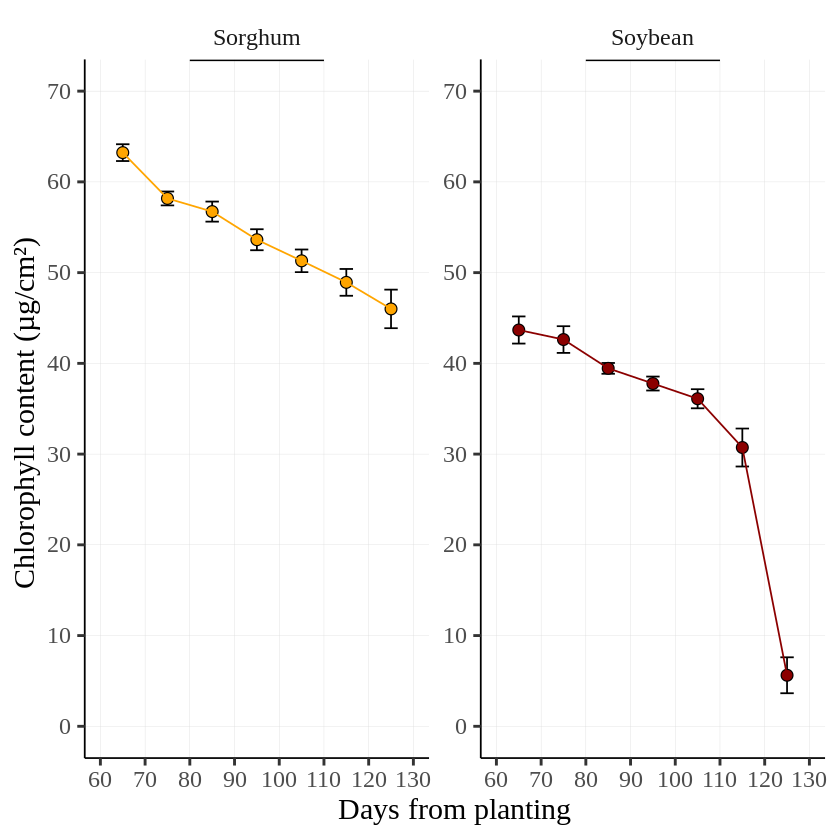

In [11]:
if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

ggplot(data=dataA,  aes(x=days, y=ch_Mean)) +
  geom_errorbar(aes(ymin=ch_Mean-ch_se, ymax=ch_Mean+ch_se),
                position="identity", width=3) +
  geom_point(aes(fill=crop, shape=crop), size=3) +
  geom_line (aes(color=crop)) +
  scale_fill_manual(values=c("orange","darkred")) +
  scale_shape_manual(values=c(21,21)) +
  scale_color_manual(values=c("orange","darkred")) +
  scale_x_continuous(breaks = seq(60, 130, 10), limits = c(60, 130)) +
  scale_y_continuous(breaks = seq(0, 70, 10), limits = c(0, 70)) +
  facet_wrap( ~ crop, scales="free",) +
  annotate("segment", x=80, xend=110, y=Inf, yend=Inf, color="black", lwd=1) +
  labs(x="Days from planting", y="Chlorophyll content (µg/cm²) ") +
  theme_classic(base_size= 18, base_family = "serif") +
  theme(legend.position="none",
        legend.title=element_blank(),
        legend.key=element_rect(color="white", fill=alpha(0.5)),
        legend.text=element_text(family="serif", face="plain",
                                 size=15, color="black"),
        legend.background= element_rect(fill=alpha(0.5)),
        panel.grid.major = element_line(color= "grey85", size = 0.1),
        strip.background=element_rect(color="white",
                                      linewidth=0.5,linetype="solid"),
        axis.line= element_line(linewidth= 0.5, colour= "black"))

# interpolate package

Before installing, please download Rtools (https://cran.r-project.org/bin/windows/Rtools)

In [15]:
if(!require(remotes)) install.packages("remotes")
if (!requireNamespace("normtools", quietly = TRUE)) {
    remotes::install_github("agronomy4future/interpolate", force= TRUE)
}
library(remotes)
library(interpolate)

── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpaZoE8N/remotesb3166534c3/agronomy4future-interpolate-e596f61/DESCRIPTION’ ... OK
* preparing ‘interpolate’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘interpolate_0.0.0.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [16]:
result= interpolate(df, x="days", y="ch", group_vars= c("crop","reps"))
print(head(result,5))
print(tail(result,5))

# A tibble: 5 × 6
  crop     reps season  days    ch category
  <chr>   <dbl>  <dbl> <int> <dbl>    <dbl>
1 Sorghum     1   2024    65  65.8        0
2 Sorghum     1     NA    66  65.0        1
3 Sorghum     1     NA    67  64.1        1
4 Sorghum     1     NA    68  63.2        1
5 Sorghum     1     NA    69  62.4        1
# A tibble: 5 × 6
  crop     reps season  days    ch category
  <chr>   <dbl>  <dbl> <int> <dbl>    <dbl>
1 Soybean     4     NA   121 17.8         1
2 Soybean     4     NA   122 14.9         1
3 Soybean     4     NA   123 11.9         1
4 Soybean     4     NA   124  9.02        1
5 Soybean     4   2024   125  6.1         0


In [19]:
if(!require(dplyr)) install.packages("dplyr")
library(dplyr)
dataB= data.frame(result %>%
                    group_by(crop, days) %>%
                    dplyr::summarize(across(c(ch),
                                            .fns= list(Mean= mean,
                                                       SD= sd,
                                                       n= length,
                                                       se= ~ sd(.)/sqrt(length(.))))))

print(head(dataB,5))
print(tail(dataB,5))

`summarise()` has grouped output by 'crop'. You can override using the
`.groups` argument.


     crop days ch_Mean     ch_SD ch_n     ch_se
1 Sorghum   65  63.225 1.8518009    4 0.9259005
2 Sorghum   66  62.720 1.5925242    4 0.7962621
3 Sorghum   67  62.215 1.3482211    4 0.6741105
4 Sorghum   68  61.710 1.1286570    4 0.5643285
5 Sorghum   69  61.205 0.9511221    4 0.4755611
       crop days ch_Mean    ch_SD ch_n    ch_se
118 Soybean  121  15.665 2.553501    4 1.276750
119 Soybean  122  13.155 2.752992    4 1.376496
120 Soybean  123  10.645 3.076248    4 1.538124
121 Soybean  124   8.135 3.489035    4 1.744518
122 Soybean  125   5.625 3.963479    4 1.981740


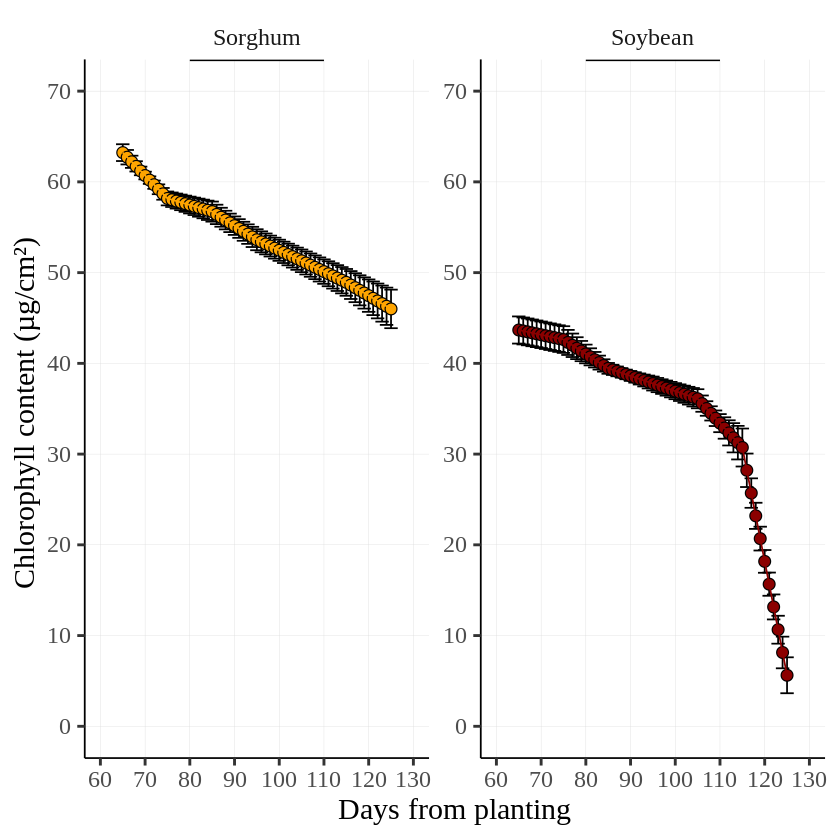

In [20]:
if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

ggplot(data=dataB,  aes(x=days, y=ch_Mean)) +
  geom_errorbar(aes(ymin=ch_Mean-ch_se, ymax=ch_Mean+ch_se),
                position="identity", width=3) +
  geom_point(aes(fill=crop, shape=crop), size=3) +
  geom_line (aes(color=crop)) +
  scale_fill_manual(values=c("orange","darkred")) +
  scale_shape_manual(values=c(21,21)) +
  scale_color_manual(values=c("orange","darkred")) +
  scale_x_continuous(breaks = seq(60, 130, 10), limits = c(60, 130)) +
  scale_y_continuous(breaks = seq(0, 70, 10), limits = c(0, 70)) +
  facet_wrap( ~ crop, scales="free",) +
  annotate("segment", x=80, xend=110, y=Inf, yend=Inf, color="black", lwd=1) +
  labs(x="Days from planting", y="Chlorophyll content (µg/cm²) ") +
  theme_classic(base_size= 18, base_family = "serif") +
  theme(legend.position="none",
        legend.title=element_blank(),
        legend.key=element_rect(color="white", fill=alpha(0.5)),
        legend.text=element_text(family="serif", face="plain",
                                 size=15, color="black"),
        legend.background= element_rect(fill=alpha(0.5)),
        panel.grid.major = element_line(color= "grey85", size = 0.1),
        strip.background=element_rect(color="white",
                                      linewidth=0.5,linetype="solid"),
        axis.line= element_line(linewidth= 0.5, colour= "black"))